In [3]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.8 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:12:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:12:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results Summary:
   Fold Size  Mean Anomaly Score  Anomalies Detected
0          5            0.035938                11.2
1         10            0.040551                 6.9
2         15            0.038662                 3.8


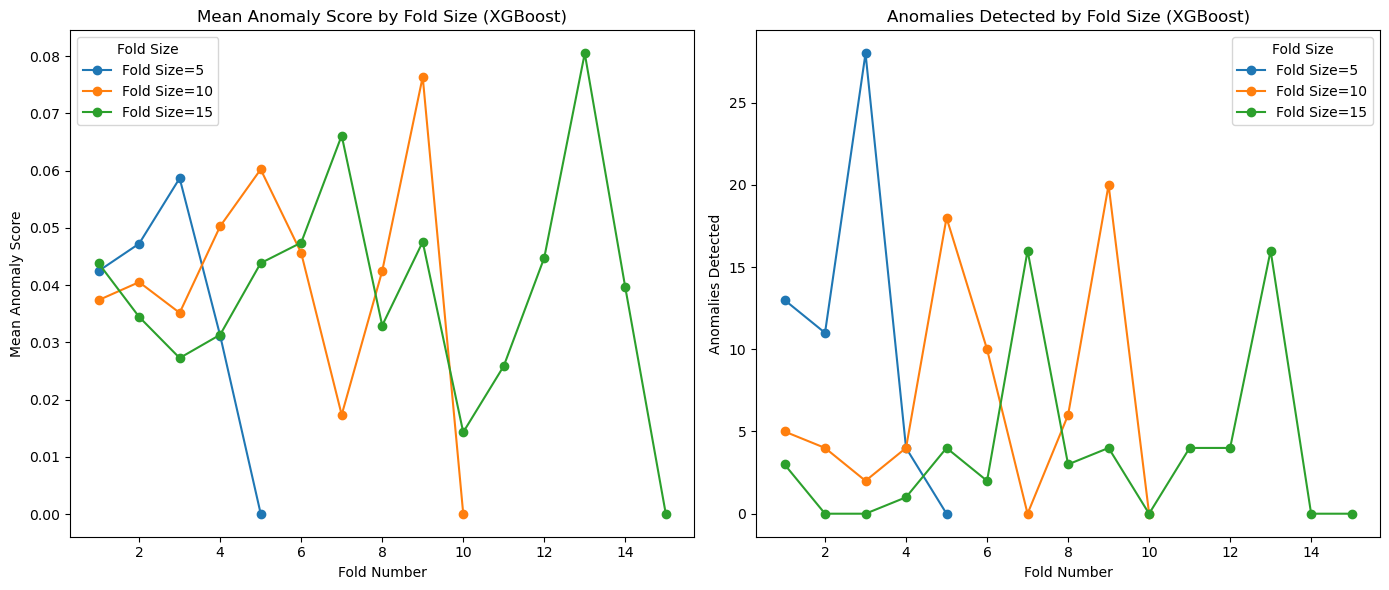

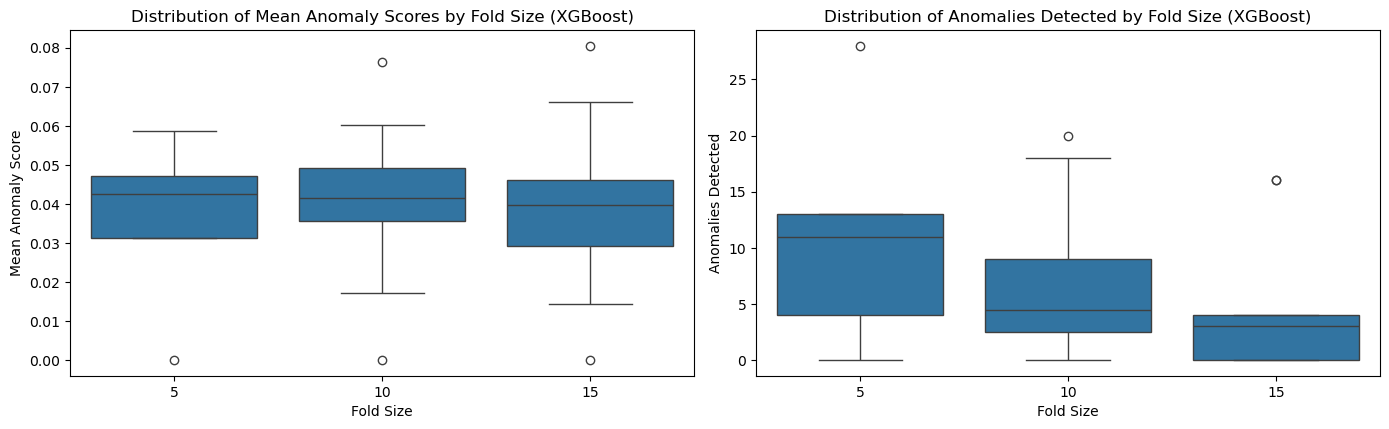

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Example code setup for XGBoost (without 'use_label_encoder')
from xgboost import XGBClassifier

# Instantiate XGBClassifier without 'use_label_encoder'
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Simulate labels for anomaly detection
# Assuming the last 5% of the dataset is anomalous for demonstration purposes
data_size = len(X)
y = np.zeros(data_size)
y[int(0.95 * data_size):] = 1  # Mark last 5% as anomalies

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate XGBoost using K-Fold Cross-Validation
def cross_validate_xgboost(fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    anomaly_threshold = 0.5  # Threshold for classifying as anomaly

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define and train XGBoost model
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict_proba(X_test)[:, 1]  # Probability of being an anomaly
        anomalies = y_pred > anomaly_threshold

        # Store results
        results['Model'].append('XGBoost')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Mean Anomaly Score'].append(y_pred.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on XGBoost with varying fold sizes
for fold_size in fold_sizes:
    cross_validate_xgboost(fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
print("Results Summary:")
print(results_df.groupby(['Fold Size'])[['Mean Anomaly Score', 'Anomalies Detected']].mean().reset_index())

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
for fold_size in results_df['Fold Size'].unique():
    subset = results_df[results_df['Fold Size'] == fold_size]
    plt.plot(subset['Fold'], subset['Mean Anomaly Score'], marker='o', label=f"Fold Size={fold_size}")
plt.xlabel("Fold Number")
plt.ylabel("Mean Anomaly Score")
plt.legend(title="Fold Size")
plt.title("Mean Anomaly Score by Fold Size (XGBoost)")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
for fold_size in results_df['Fold Size'].unique():
    subset = results_df[results_df['Fold Size'] == fold_size]
    plt.plot(subset['Fold'], subset['Anomalies Detected'], marker='o', label=f"Fold Size={fold_size}")
plt.xlabel("Fold Number")
plt.ylabel("Anomalies Detected")
plt.legend(title="Fold Size")
plt.title("Anomalies Detected by Fold Size (XGBoost)")

plt.tight_layout()
plt.show()

# Additional Plots for Detailed Analysis
plt.figure(figsize=(14, 8))

# Distribution of Mean Anomaly Scores by Fold Size
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, x='Fold Size', y='Mean Anomaly Score')
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Distribution of Mean Anomaly Scores by Fold Size (XGBoost)")

# Distribution of Anomalies Detected by Fold Size
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, x='Fold Size', y='Anomalies Detected')
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Distribution of Anomalies Detected by Fold Size (XGBoost)")

plt.tight_layout()
plt.show()